In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [5]:
df = pd.read_csv('inv_listing_1705')
df_1 = pd.read_csv('inv_listing_17051905')
df_2 = pd.read_csv('inv_listing_20052305')
df_3 = pd.read_csv('inv_listing_24052605')
df_4 = pd.read_csv('inv_listing_27052805')
df_5 = pd.read_csv('inv_listing_30053105')
df_sn = pd.read_csv('listing_snapshot_marchapril')
df_sn_1 = pd.read_csv('listing_snapshot_janfeb')
df_sn_2 = pd.read_csv('listing_snapshot_may')

In [6]:
df = pd.concat([df, df_1, df_2, df_3, df_4, df_5], ignore_index=True)

In [10]:
d = df[['id', 'source','created_date', 'last_modified_date', 'deactivation_date']]

In [11]:
def age_dataframes(df, date):
    df_d = df[(pd.to_datetime(df.created_date)<=pd.to_datetime(date))&((pd.to_datetime(df.deactivation_date)>=pd.to_datetime(date))|(df.deactivation_date.isnull()))]
    dt = pd.to_datetime(date)
    df_d['age'] = (dt - pd.to_datetime(df.created_date)).dt.days
    df_d.loc[df_d['age'] <= 3, 'age_bin'] = '<=3'
    df_d.loc[(df_d['age'] >3)&(df_d['age'] <=20), 'age_bin'] = '<=20'
    df_d.loc[(df_d['age'] >21)&(df_d['age'] <=100), 'age_bin'] = '<=100'
    df_d.loc[df_d['age'] > 100, 'age_bin'] = '>100'
    return df_d

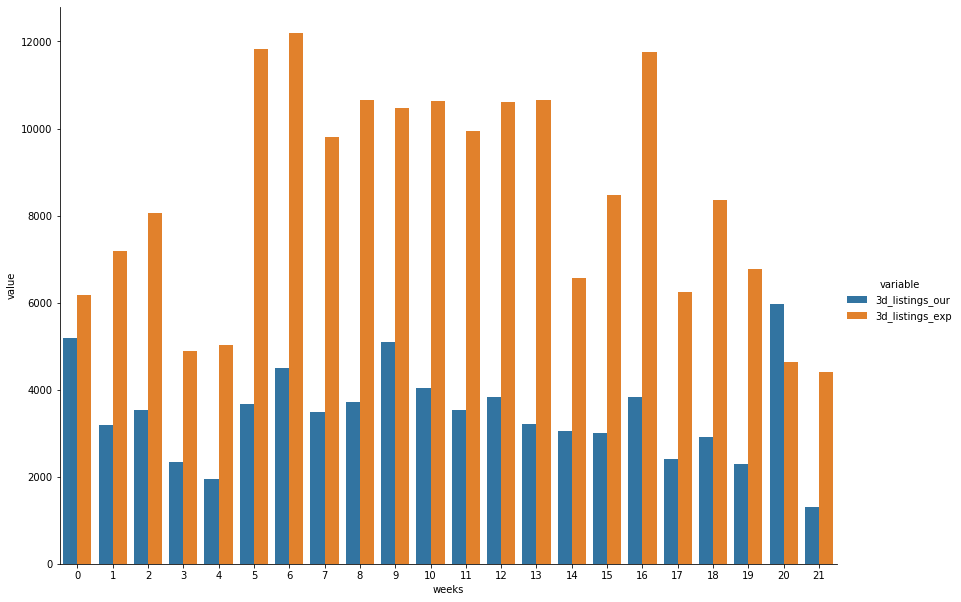

In [9]:
ddd_ = d[d.source.isin(['DEALER_PLATFORM', 'MANUAL'])]
ddd__ = d[d.source.isin(['TUTTI', 'TDA'])]
date_ = pd.to_datetime('2021-01-01')
dates_2021 = []
for i in range(0,150):
    dates_2021.append(date_+timedelta(days=i))
fresh_l_our = []
fresh_l_exp = []
for dt in dates_2021:
    dd_ = age_dataframes(ddd_, dt)
    dd__ = age_dataframes(ddd__, dt)
    fresh_l_our.append(dd_[dd_.age_bin=='<=3'].id.count())
    fresh_l_exp.append(dd__[dd__.age_bin=='<=3'].id.count())

weeks_l = []
for i in range(1, 22):
    weeks_l.append([i]*7)
flat_list = [item for sublist in weeks_l for item in sublist]
flat_list.insert(0,0)
flat_list.insert(0,0)
flat_list.insert(0,0)
weeks_list = flat_list
df_t = pd.DataFrame({'date':dates_2021, '3d_listings_our': fresh_l_our, '3d_listings_exp': fresh_l_exp,'weeks':weeks_list})
df_w = df_t.groupby(['weeks'])['3d_listings_our', '3d_listings_exp'].mean().reset_index().sort_values(by='weeks')

sns.catplot(data =pd.melt(df_w, ['weeks']), x = 'weeks', y='value', hue = 'variable', kind = 'bar', height=8.27, aspect=11.7/8.27);


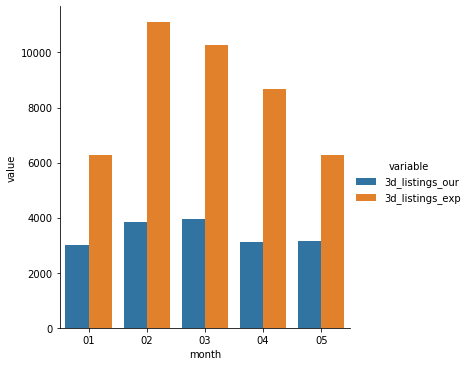

In [12]:
df_t['month'] = df_t.date.astype(str).str.slice(5,7)
df_w = df_t.groupby(['month'])['3d_listings_our', '3d_listings_exp'].mean().reset_index().sort_values(by='month')
sns.catplot(data =pd.melt(df_w, ['month']), x = 'month', y='value', hue = 'variable', kind = 'bar');

In [13]:
def average_age(df, date):
    df_d = df[(pd.to_datetime(df.created_date)<=pd.to_datetime(date))&((pd.to_datetime(df.deactivation_date)>=pd.to_datetime(date))|(df.deactivation_date.isnull()))]
    dt = pd.to_datetime(date)
    df_d['age'] = (dt - pd.to_datetime(df.created_date)).dt.days
    return df_d.age.median()

def average_age_cup100(df, date):
    df_d = df[(pd.to_datetime(df.created_date)<=pd.to_datetime(date))&((pd.to_datetime(df.deactivation_date)>=pd.to_datetime(date))|(df.deactivation_date.isnull()))]
    dt = pd.to_datetime(date)
    df_d['age'] = (dt - pd.to_datetime(df.created_date)).dt.days
    return df_d[df_d.age<100].age.median()
    

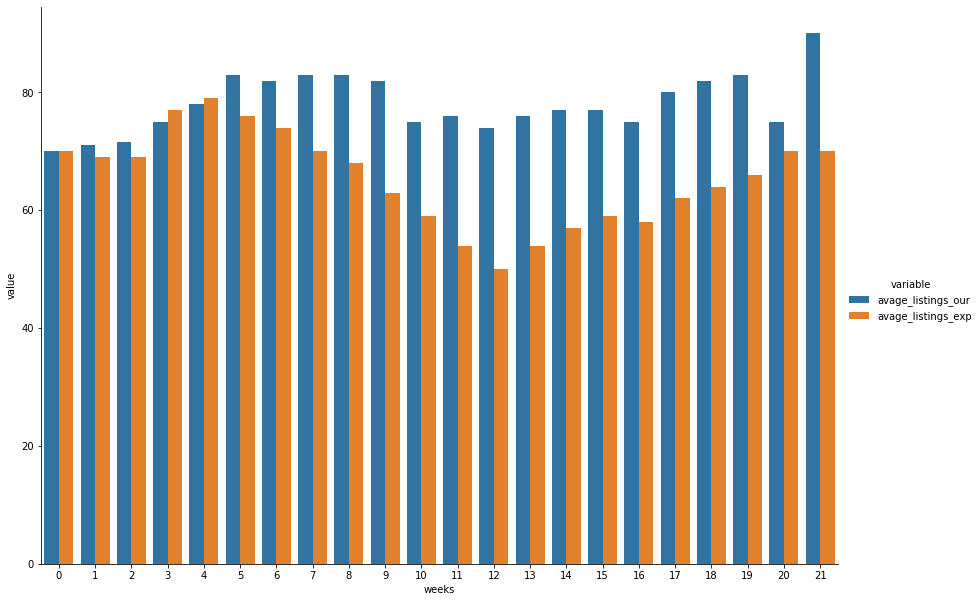

In [19]:
#average age ours/exp
date_ = pd.to_datetime('2021-01-01')
dates_ = []
for i in range(0,150):
    dates_.append(date_+timedelta(days=i))
avage_l_our = []
avage_l_exp = []
avage_l_our_cup100 = []
avage_l_exp_cup100 = []
for dt in dates_:
    aa_ = average_age(ddd_, dt)
    aa__ = average_age(ddd__, dt)
    aac_ = average_age_cup100(ddd_, dt)
    aac__ = average_age_cup100(ddd__, dt)
    avage_l_our.append(aa_)
    avage_l_exp.append(aa__)
    avage_l_our_cup100.append(aac_)
    avage_l_exp_cup100.append(aac__)
weeks_l = []
for i in range(1, 22):
    weeks_l.append([i]*7)
flat_list = [item for sublist in weeks_l for item in sublist]
flat_list.insert(0,0)
flat_list.insert(0,0)
flat_list.insert(0,0)
weeks_list = flat_list
df_a = pd.DataFrame({'date':dates_, 'avage_listings_our': avage_l_our, 'avage_listings_exp': avage_l_exp,'avage_listings_our_cup':avage_l_our_cup100,'avage_listings_exp_cup':avage_l_exp_cup100,'weeks':weeks_list})
#df_w = df_n.groupby(['weeks'])['listings'].mean().reset_index().sort_values(by='weeks')
#sns.catplot(data=df_w, y = 'listings', x = 'weeks', kind = 'bar')
df_aw = df_a.groupby(['weeks'])['avage_listings_our','avage_listings_exp'].median().reset_index().sort_values(by='weeks')
sns.catplot(data =pd.melt(df_aw, ['weeks']), x = 'weeks', y='value', hue = 'variable', kind = 'bar', height=8.27, aspect=11.7/8.27);


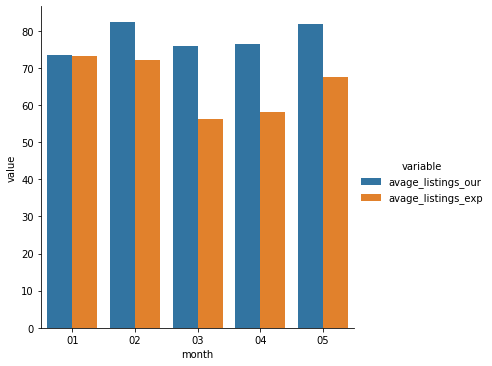

In [20]:
df_a['month'] = df_a.date.astype(str).str.slice(5,7)
df_aw = df_a.groupby(['month'])['avage_listings_our','avage_listings_exp'].mean().reset_index().sort_values(by='month')
sns.catplot(data =pd.melt(df_aw, ['month']), x = 'month', y='value', hue = 'variable', kind = 'bar');


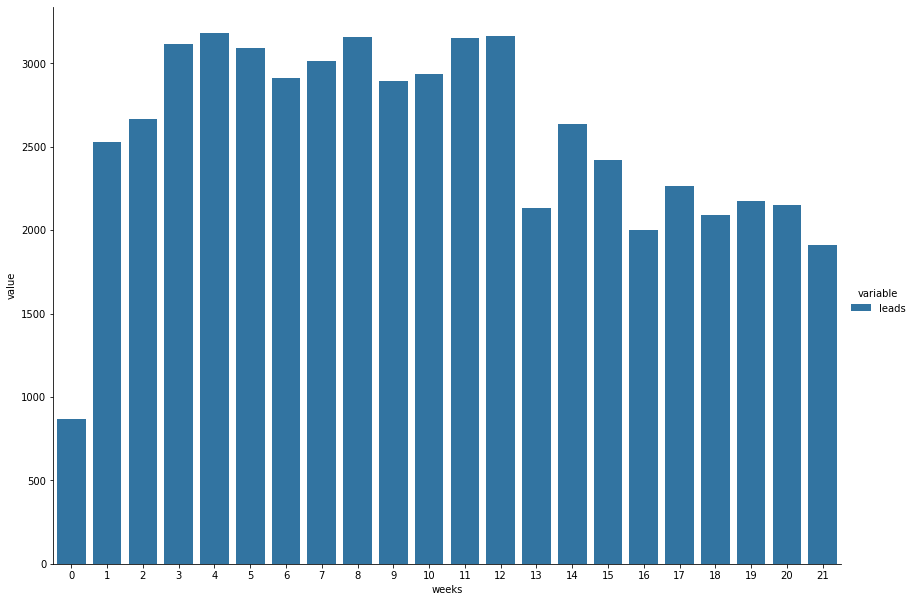

In [21]:
df_snn = pd.concat([df_sn_1, df_sn, df_sn_2], ignore_index=True)
df_snn['leads_total'] = df_snn['no_of_message_leads'] + df_snn['no_of_ga_call_leads'] 
date_ = pd.to_datetime('2021-01-01')
dates_ = []
for i in range(0,150):
    dates_.append(date_+timedelta(days=i))
leads = []
for dt in dates_:
    leads.append(df_snn[pd.to_datetime(df_snn.date)==dt]['leads_total'].sum())
    
weeks_l = []
for i in range(1, 22):
    weeks_l.append([i]*7)
flat_list = [item for sublist in weeks_l for item in sublist]
flat_list.insert(0,0)
flat_list.insert(0,0)
flat_list.insert(0,0)
weeks_list = flat_list
df_l = pd.DataFrame({'date':dates_,'leads':leads,'weeks':weeks_list})
df_lw = df_l.groupby(['weeks'])['leads'].sum().reset_index().sort_values(by='weeks')
sns.catplot(data =pd.melt(df_lw, ['weeks']), x = 'weeks', y='value', hue = 'variable', kind = 'bar', height=8.27, aspect=11.7/8.27);


In [23]:
df['year'] = df.created_date.astype(str).str.slice(0,4)
df['month'] = df.created_date.astype(str).str.slice(5,7)
df[['year','month']].head()

,year,month
0,2018,10
1,2018,10
2,2018,10
3,2018,10
4,2018,10


In [ ]:
df[df.year=='2021'].groupby('month').price.median()

In [27]:
def median_price_(df, date):
    df_d = df[(pd.to_datetime(df.created_date)<=pd.to_datetime(date))&((pd.to_datetime(df.deactivation_date)>=pd.to_datetime(date))|(df.deactivation_date.isnull()))]
    return df_d.price.median()

In [28]:
date_ = pd.to_datetime('2021-01-01')
dates_ = []
for i in range(0,150):
    dates_.append(date_+timedelta(days=i))
median_price = []
for dt in dates_:
    median_price.append(median_price_(df,dt))
    
df_l = pd.DataFrame({'date':dates_,'median_price':median_price})
df_l.head()

,date,median_price
0,2021-01-01,19999.0
1,2021-01-02,20000.0
2,2021-01-03,19999.0
3,2021-01-04,19999.0
4,2021-01-05,19999.0


In [30]:
df_l['month']= df_l.date.astype(str).str.slice(5,7)
d = df_l.groupby(['month'])['median_price'].mean().reset_index()

In [32]:
months = ['01', '02', '03', '04', '05']
median_price_leads = []
for m in months:
    median_price_leads.append(df_snn[(df_snn.no_of_ga_unique_pdp_views>0)&(df_snn.date.str.slice(5,7)==m)].price.median())
    #median_price.append(df[(pd.to_datetime(df.created_date)<=pd.to_datetime(date))&((pd.to_datetime(df.deactivation_date)>=pd.to_datetime(date))|(df.deactivation_date.isnull()))].price.median())
    
df_l = pd.DataFrame({'month':months,'median_price_leads':median_price_leads})
dd_m= pd.merge(df_l, d, on='month')

In [33]:
dd_m.head()

,month,median_price_leads,median_price
0,01,15900.0,20449.758065
1,02,16500.0,20854.178571
2,03,16700.0,20900.000000
3,04,16900.0,20780.850000
4,05,17500.0,20409.016667


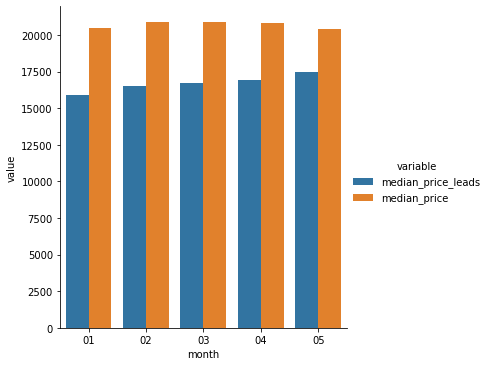

In [35]:
sns.catplot(data =pd.melt(dd_m, ['month']), x = 'month', y='value', hue = 'variable', kind = 'bar');
#to add the median price for the total inv

In [36]:
df_s = pd.read_csv('searches')

In [37]:
df_s['month'] = df_s.date.astype('str').str.slice(5,7)

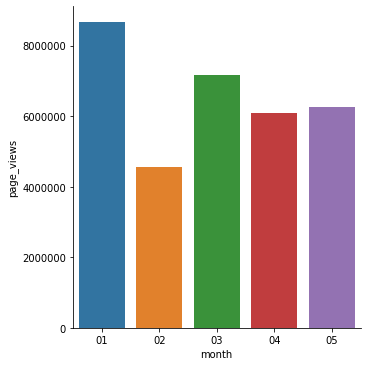

In [38]:
g = df_s.groupby(['month'])['page_views'].sum().reset_index()
sns.catplot(data=g, y = 'page_views', x = 'month', kind = 'bar')

In [42]:
df_s.groupby(['model'])['page_views'].sum().reset_index().sort_values(by='page_views', ascending= False)

,model,page_views
5894,golf,552266
2445,3er,333205
3013,911,244823
4194,c-klasse,228603
4783,e-klasse,206029
...,...,...
6324,i30-wagon-15-t-gdi-amplia-1167102,1
6323,i30-wagon-14-t-gdi-vertex-1389552,1
6313,i30-n-20-t-gdi-project-c-932146,1
6309,i30-n-20-t-gdi-project-c-1381132#tblciGiD-6V0Z...,1


In [57]:
def string_contains_price(col):
    if 'priceTo=50000' in col:
        return 'priceTo=50000'
    elif 'priceTo=30000' in col:
        return 'priceTo=30000'
    elif 'priceTo=15000' in col:
        return 'priceTo=15000'
    elif 'priceTo=10000' in col:
        return 'priceTo=10000'
    elif 'priceTo=5000' in col:
        return 'priceTo=5000'
    else:
        return 'nopriceTo'

In [58]:
df_s['priceTo'] = df_s.page_path.apply(string_contains_price)

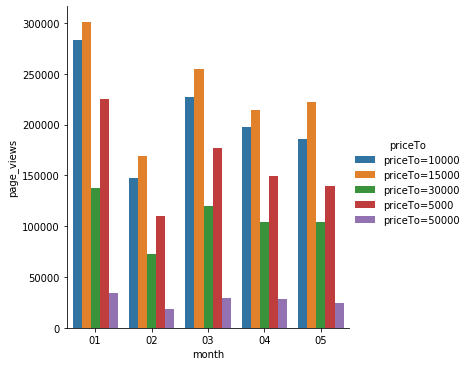

In [87]:
d = df_s[df_s.priceTo!='nopriceTo'].groupby(['month','priceTo'])['page_views'].sum().reset_index()
sns.catplot(data=d, y = 'page_views', x = 'month', hue = 'priceTo', kind = 'bar')

In [86]:
d

,month,priceTo,page_views,normalized
0,01,priceTo=10000,282862,0.076890
1,01,priceTo=15000,301246,0.081888
2,01,priceTo=30000,138033,0.037521
3,01,priceTo=5000,225651,0.061339
4,01,priceTo=50000,33866,0.009206
5,02,priceTo=10000,147482,0.040090
6,02,priceTo=15000,168983,0.045935
7,02,priceTo=30000,72539,0.019718
8,02,priceTo=5000,109539,0.029776
9,02,priceTo=50000,18710,0.005086


In [85]:
d['norm']  = d.apply(norm_pv, axis = 1)

AttributeError: ("'str' object has no attribute 'page_views'", 'occurred at index 0')

In [76]:
d.page_views/d[d.priceTo=='priceTo=10000'].page_views.sum()

0     0.271790
1     0.289454
2     0.132630
3     0.216818
4     0.032540
5     0.141709
6     0.162368
7     0.069700
8     0.105251
9     0.017978
10    0.218054
11    0.244780
12    0.115644
13    0.170376
14    0.028476
15    0.190021
16    0.206002
17    0.099811
18    0.143999
19    0.026923
20    0.178427
21    0.213924
22    0.100472
23    0.133854
24    0.023771
Name: page_views, dtype: float64

In [78]:
d[d.priceTo=='priceTo==5000'].page_views.values

array([], dtype=int64)

In [84]:
def norm_pv(df):
    if df.priceTo=='priceTo=5000':
        return df.page_views/df[df.priceTo=='priceTo=5000'].page_views.sum()
    elif df.priceTo=='priceTo=10000':
        return df.page_views/df[df.priceTo=='priceTo=10000'].page_views.sum()
    elif df.priceTo=='priceTo=15000':
        return df.page_views/df[df.priceTo=='priceTo=15000'].page_views.sum()
    elif df.priceTo=='priceTo=30000':
        return df.page_views/df[df.priceTo=='priceTo=30000'].page_views.sum()
    else:
        return df.page_views/df[df.priceTo=='priceTo=50000'].page_views.sum()

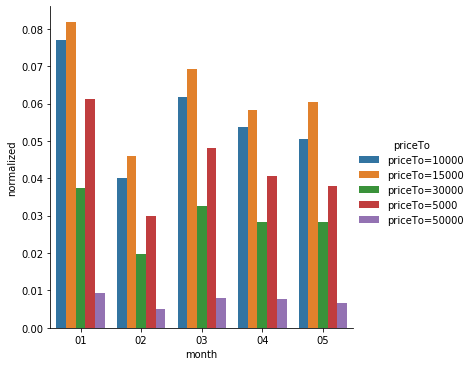

In [64]:
sns.catplot(data=d, y = 'normalized', x = 'month', hue = 'priceTo', kind = 'bar')

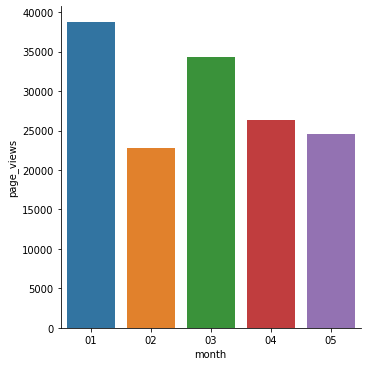

In [94]:
g = df_s[df_s.model=='tiguan'].groupby(['month'])['page_views'].sum().reset_index()
sns.catplot(data=g, y = 'page_views', x = 'month', kind = 'bar')

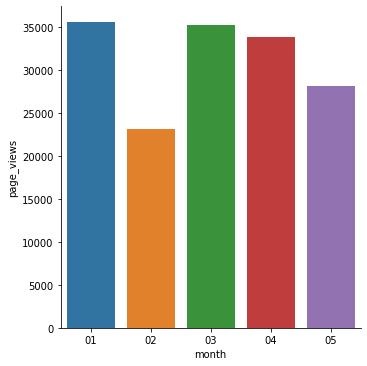

In [95]:
g = df_s[df_s.model=='500'].groupby(['month'])['page_views'].sum().reset_index()
sns.catplot(data=g, y = 'page_views', x = 'month', kind = 'bar')

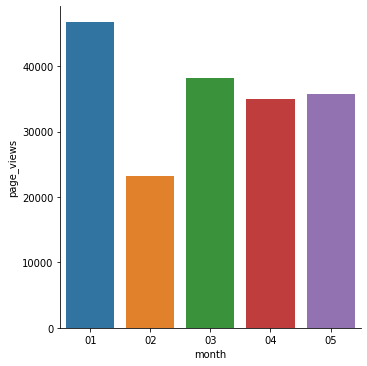

In [96]:
g = df_s[df_s.model.isin(['6er', 'x5'])].groupby(['month'])['page_views'].sum().reset_index()
sns.catplot(data=g, y = 'page_views', x = 'month', kind = 'bar')

In [ ]:
#make price buckets, relative changes

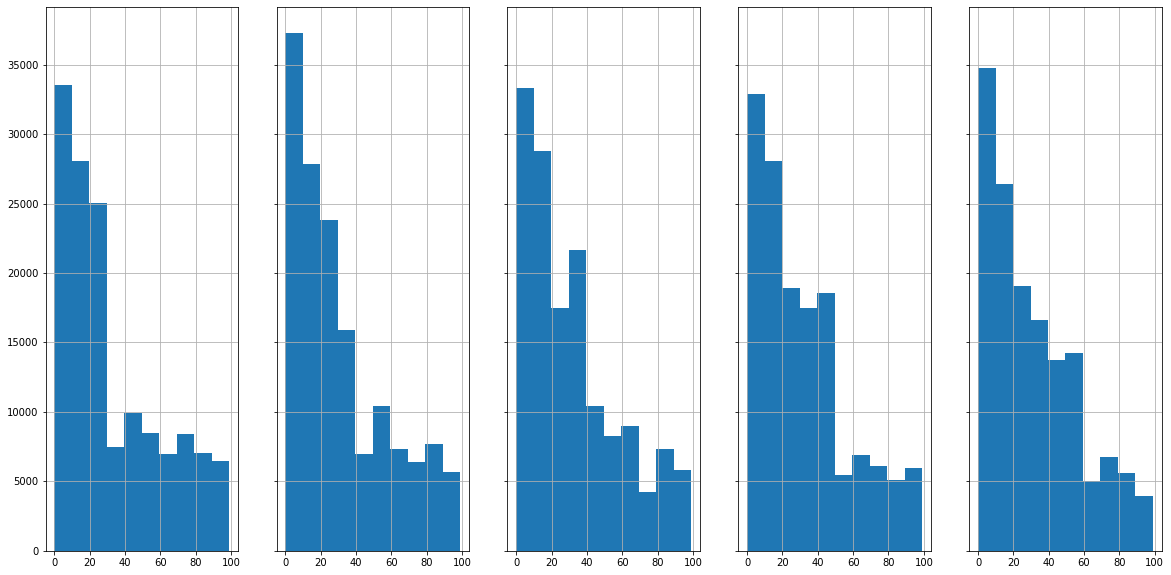

In [69]:
fig, ax = plt.subplots(1, 5, figsize = (20,10), sharex='col', sharey='row')
d = df[['id', 'source','created_date', 'last_modified_date', 'deactivation_date']]
first_march_mon = pd.to_datetime('2021-03-01')
march_mondays = [first_march_mon, first_march_mon + timedelta(days=7), first_march_mon + timedelta(days=14), first_march_mon + timedelta(days=21),first_march_mon + timedelta(days=28)  ]
for i in range(0,5):
    dd = age_dataframes(d, march_mondays[i])
    dd[dd.age<100].age.hist(ax=ax[i])

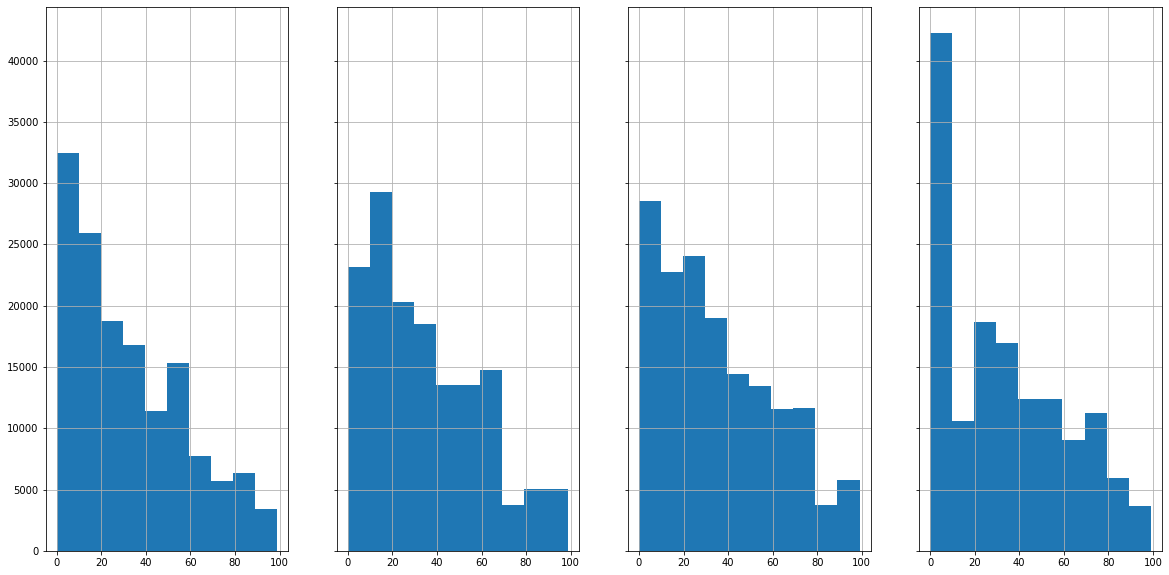

In [65]:
fig, ax = plt.subplots(1, 4, figsize = (20,10), sharex='col', sharey='row')
d = df[['id', 'source','created_date', 'last_modified_date', 'deactivation_date']]
first_april_mon = pd.to_datetime('2021-04-04')
april_mondays = [first_april_mon, first_april_mon + timedelta(days=7), first_april_mon + timedelta(days=14), first_april_mon + timedelta(days=21) ]
for i in range(0,4):
    dd = age_dataframes(d, april_mondays[i])
    dd[dd.age<100].age.hist(ax=ax[i])

In [71]:
df_snn.head()

,Unnamed: 0,date,original_dealer_id,original_listing_id,price,age,no_of_message_leads,no_of_ga_pdp_views,no_of_ga_unique_pdp_views,no_of_ga_call_leads,no_of_ga_message_leads,leads_total
0,0,2021-02-08,159622,692883,499950.0,294,0,1,1,0,0,0
1,1,2021-02-07,159622,692883,499950.0,293,0,1,1,0,0,0
2,2,2021-02-06,159622,692883,499950.0,292,0,0,0,0,0,0
3,3,2021-02-05,159622,692883,499950.0,291,0,0,0,0,0,0
4,4,2021-02-04,159622,692883,499950.0,290,0,0,0,0,0,0


In [73]:
df_snn['month'] = df_snn.date.astype('str').str.slice(5,7)

In [75]:
df_snn[df_snn.leads_total>0].groupby(['month'])['age'].median()

month
01    47
02    51
03    31
04    39
05    55
Name: age, dtype: int64

In [76]:
df_snn[df_snn.no_of_ga_pdp_views>0].groupby(['month'])['age'].median()

month
01    54
02    50
03    37
04    42
05    53
Name: age, dtype: int64

In [78]:
df_snn[df_snn.age<=3].groupby(['month']).leads_total.sum()

month
01    1629
02    1693
03    1959
04    1019
05     978
Name: leads_total, dtype: int64

In [88]:
def age_l(col):
    if col<=3:
        return '<=3'
    elif col<=20:
        return '<=20'
    elif col<=100:
        return '<=100'
    else:
        return '>100'
    

In [89]:
df_snn['age_cat'] = df_snn.age.apply(age_l)

In [92]:
df_g = df_snn.groupby(['age_cat','month'])['leads_total'].sum().reset_index().sort_values(by='age_cat')

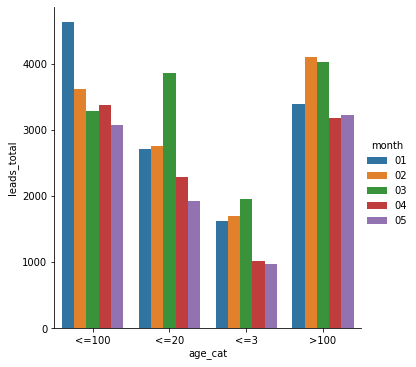

In [93]:
sns.catplot(data =df_g, x = 'age_cat', y='leads_total', hue = 'month', kind = 'bar');

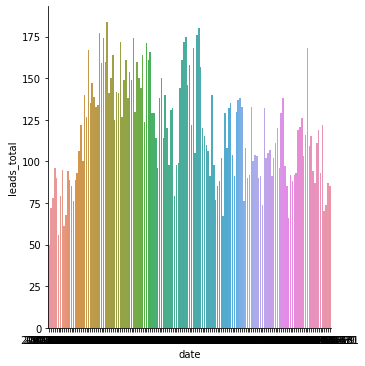

In [119]:
gg = df_snn[(df_snn.age_cat=='>100')].groupby(['date'])['leads_total'].sum().reset_index()
sns.catplot(data =gg, x = 'date', y='leads_total', kind = 'bar');

In [ ]:
#to split to our/exp inventory

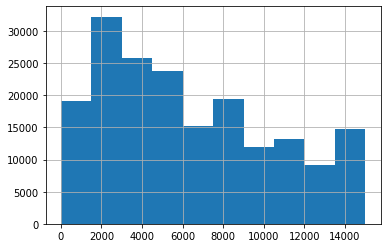

In [111]:
df_snn[(df_snn.month=='03')&(df_snn.age_cat=='<=3')&(df_snn.price<15000)].price.hist()

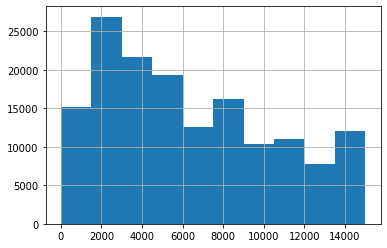

In [112]:
df_snn[(df_snn.month=='04')&(df_snn.age_cat=='<=3')&(df_snn.price<15000)].price.hist()

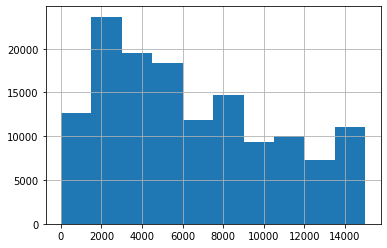

In [113]:
df_snn[(df_snn.month=='05')&(df_snn.age_cat=='<=3')&(df_snn.price<15000)].price.hist()

In [108]:
df_snn[(df_snn.month=='03')&(df_snn.age_cat=='<=3')&(df_snn.price<30000)].price.median()

8950.0

In [109]:
df_snn[(df_snn.month=='04')&(df_snn.age_cat=='<=3')&(df_snn.price<30000)].price.median()

8950.0

In [110]:
df_snn[(df_snn.month=='05')&(df_snn.age_cat=='<=3')&(df_snn.price<30000)].price.median()

8999.0